In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv("data/responses.csv")

In [5]:
data.head(2).T

,0,1
Music,5,4
Slow songs or fast songs,3,4
Dance,2,2
Folk,1,1
Country,2,1
Classical music,2,1
Musical,1,2
Pop,5,3
Rock,5,5
Metal or Hardrock,1,4


In [6]:
data = data[["Happiness in life", "Age", "Height", "Gender", "Weight", 
              "Left - right handed", "Village - town", "Getting up", "God",
              "Health", "Borrowed stuff", "Self-criticism", "Elections", 
              "Smoking", "Alcohol" ,"Number of friends", "Spending on healthy eating",
              "Music", "Movies", "Friends versus money", "Changing the past"]]

In [8]:
data.shape

(1010, 21)

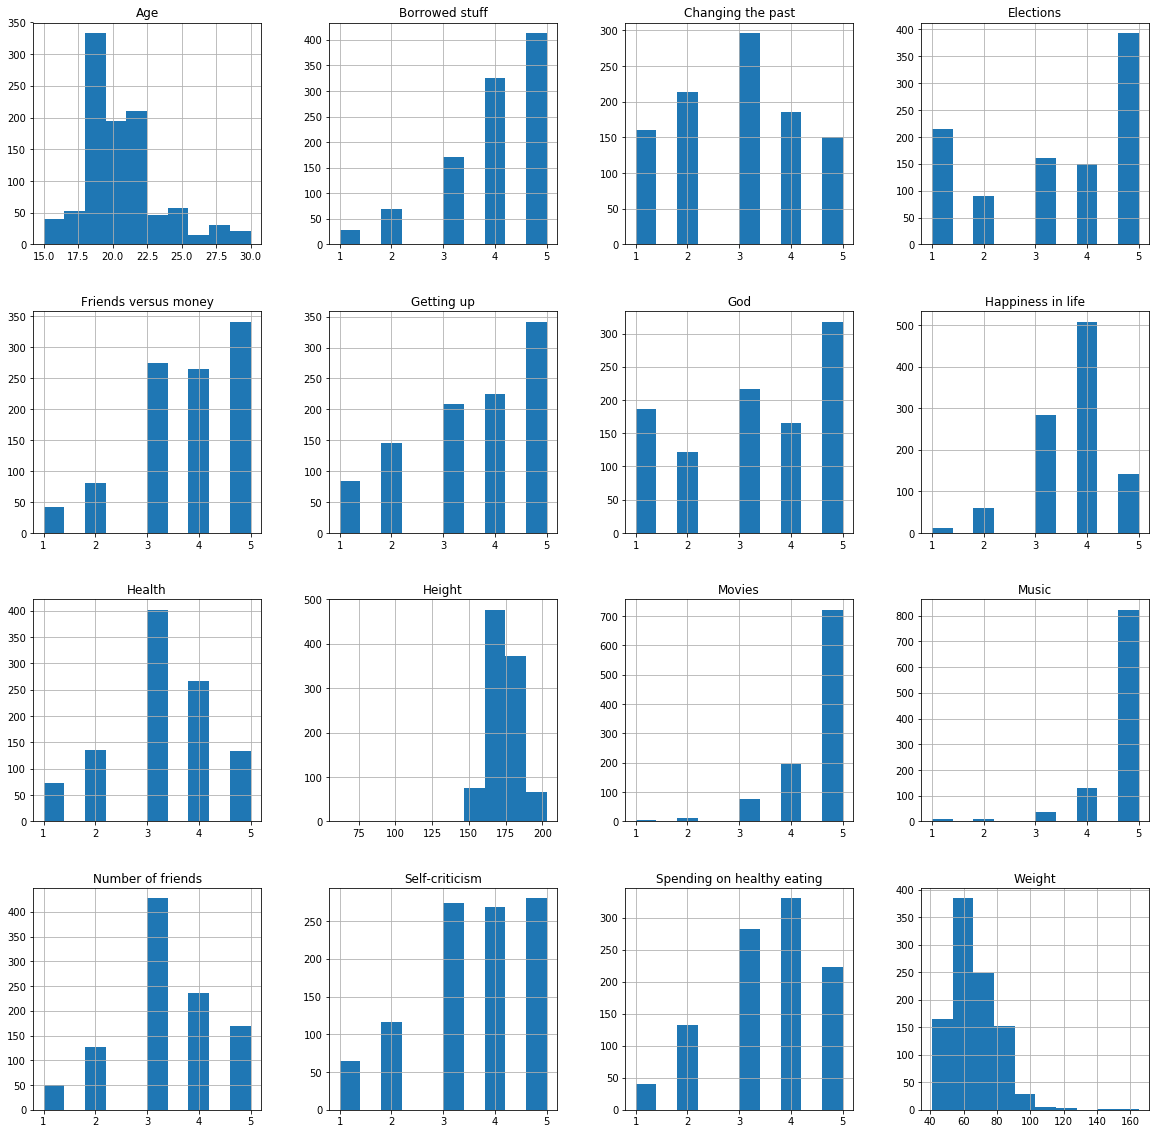

In [9]:
data.hist(figsize=(20, 20));

In [25]:
target

['Happiness in life']

In [15]:
categorical

['Gender',
 'Left - right handed',
 'Village - town',
 'Getting up',
 'God',
 'Health',
 'Borrowed stuff',
 'Self-criticism',
 'Elections',
 'Smoking',
 'Alcohol',
 'Number of friends',
 'Spending on healthy eating',
 'Music',
 'Movies',
 'Friends versus money',
 'Changing the past']

In [27]:
categorical.append(target[0])

In [29]:
# sns.pairplot(data=data[categorical], hue=target[0])

In [10]:
numerical = ['Age', 'Height', 'Weight']
target = ['Happiness in life']
categorical = [col for col in data.columns if col not in numerical+target]

In [16]:
data[categorical].head()

,Gender,Left - right handed,Village - town,Getting up,God,Health,Borrowed stuff,Self-criticism,Elections,Smoking,Alcohol,Number of friends,Spending on healthy eating,Music,Movies,Friends versus money,Changing the past
0,female,right handed,village,2.0,1.0,1.0,4.0,1.0,4.0,never smoked,drink a lot,3,3.0,5.0,5.0,3.0,1.0
1,female,right handed,city,5.0,1.0,4.0,3.0,4.0,5.0,never smoked,drink a lot,3,2.0,4.0,5.0,4.0,4.0
2,female,right handed,city,4.0,5.0,2.0,2.0,4.0,5.0,tried smoking,drink a lot,3,2.0,5.0,5.0,5.0,5.0
3,female,right handed,city,1.0,4.0,1.0,5.0,5.0,5.0,former smoker,drink a lot,1,1.0,5.0,5.0,2.0,5.0
4,female,right handed,village,4.0,5.0,3.0,4.0,5.0,5.0,tried smoking,social drinker,3,4.0,5.0,5.0,3.0,4.0


In [17]:
to_dummies = [
    'Gender',
    'Left - right handed',
    'Village - town',
    'Smoking',
    'Alcohol'
]

In [18]:
data_preprocessed = pd.get_dummies(data, columns=to_dummies, drop_first=True)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [34]:
data_preprocessed.isnull().sum()/len(data_preprocessed)*100

Happiness in life                   0.396040
Age                                 0.693069
Height                              1.980198
Weight                              1.980198
Getting up                          0.495050
God                                 0.198020
Health                              0.099010
Borrowed stuff                      0.198020
Self-criticism                      0.495050
Elections                           0.297030
Number of friends                   0.000000
Spending on healthy eating          0.198020
Music                               0.297030
Movies                              0.594059
Friends versus money                0.594059
Changing the past                   0.198020
Gender_male                         0.000000
Left - right handed_right handed    0.000000
Village - town_village              0.000000
Smoking_former smoker               0.000000
Smoking_never smoked                0.000000
Smoking_tried smoking               0.000000
Alcohol_ne

In [35]:
data_preprocessed.dropna(inplace=True)

In [36]:
data_preprocessed.shape

(942, 24)

In [39]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

     
X_train, X_test, y_train, y_test = train_test_split(
    data_preprocessed.drop(target, axis=1), 
    data_preprocessed[target], 
    test_size=0.20, 
    random_state=42, 
    stratify=data_preprocessed[target]
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical])
X_test_scaled = scaler.transform(X_test[numerical])

X_train[numerical] = X_train_scaled
X_test[numerical] = X_test_scaled

In [58]:
y_train['Happiness in life'].value_counts(normalize=True)

4.0    0.505976
3.0    0.280212
5.0    0.140770
2.0    0.059761
1.0    0.013280
Name: Happiness in life, dtype: float64

In [57]:
y_naive_pred = np.random.choice(
    [4., 3., 5., 2., 1.], 
    len(y_test), 
    p=y_train['Happiness in life'].value_counts(normalize=True).values)

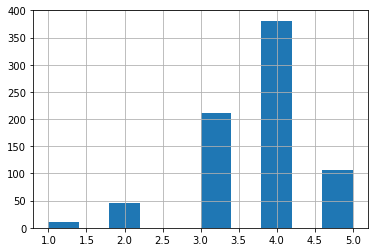

In [63]:
y_train['Happiness in life'].hist()

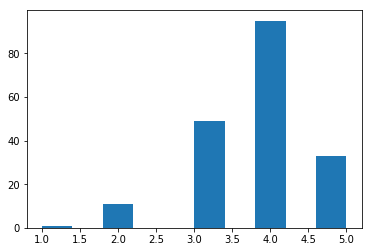

In [64]:
plt.hist(y_naive_pred);

In [59]:
print(classification_report(y_test, y_naive_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.27      0.27      0.27        11
         3.0       0.33      0.30      0.31        53
         4.0       0.51      0.50      0.50        96
         5.0       0.21      0.26      0.23        27

   micro avg       0.39      0.39      0.39       189
   macro avg       0.26      0.27      0.26       189
weighted avg       0.39      0.39      0.39       189



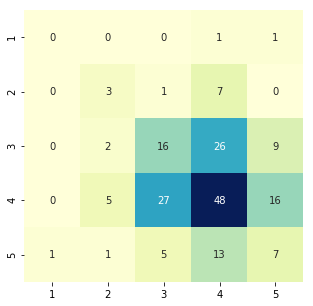

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_naive_pred)

conf_matrix = pd.DataFrame(data = cm, index=range(1, 6), columns=range(1, 6))
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        11
         3.0       0.34      0.26      0.30        53
         4.0       0.56      0.81      0.66        96
         5.0       0.86      0.22      0.35        27

   micro avg       0.52      0.52      0.52       189
   macro avg       0.35      0.26      0.26       189
weighted avg       0.50      0.52      0.47       189



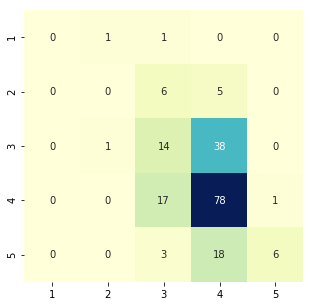

In [70]:
cm = confusion_matrix(y_test, log_reg.predict(X_test))
conf_matrix = pd.DataFrame(data = cm, index=range(1, 6), columns=range(1, 6))
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

In [75]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

sfk = StratifiedKFold(n_splits=5)

logit_cv = LogisticRegressionCV(Cs=1000, cv=sfk, solver='lbfgs')

logit_cv.fit(X_train, y_train)

print(classification_report(y_test, logit_cv.predict(X_test)))

cm = confusion_matrix(y_test, logit_cv.predict(X_test))
conf_matrix = pd.DataFrame(data = cm, index=range(1, 6), columns=range(1, 6))
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

              precision    recall  f1-score   support

         1.0       0.10      0.50      0.17         2
         2.0       0.17      0.27      0.21        11
         3.0       0.36      0.40      0.38        53
         4.0       0.56      0.45      0.50        96
         5.0       0.38      0.37      0.38        27

   micro avg       0.41      0.41      0.41       189
   macro avg       0.31      0.40      0.33       189
weighted avg       0.45      0.41      0.43       189



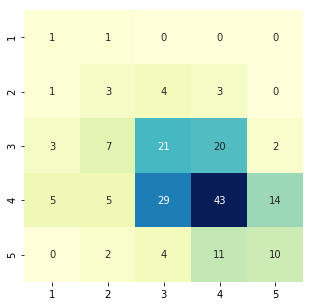

In [76]:
log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(X_train, y_train)

print(classification_report(y_test, log_reg.predict(X_test)))

cm = confusion_matrix(y_test, log_reg.predict(X_test))
conf_matrix = pd.DataFrame(data = cm, index=range(1, 6), columns=range(1, 6))
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

In [79]:
log_reg.coef_[0, :]

array([-1.2363442 , -0.70098387, -1.37993867,  0.77894548, -0.44805862,
       -1.49903985,  0.84163505,  0.18975288, -0.88214427, -0.79832406,
       -0.80583145, -0.99707314, -0.54724781,  0.23282291,  1.55168971,
        2.40042342,  0.44736957,  1.74433945,  2.04727645, -0.33240605,
       -2.49591483, -1.00108915, -0.28471659])

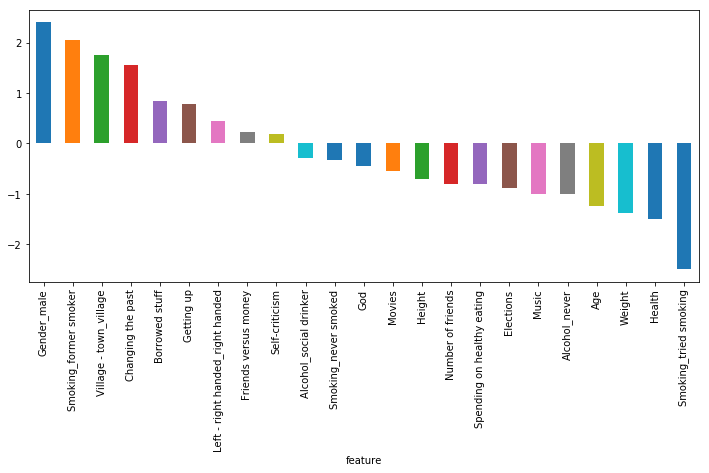

In [80]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": log_reg.coef_[0, : ]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))
featureImportance["importance"].tail(30).plot('bar', figsize=(12,5))

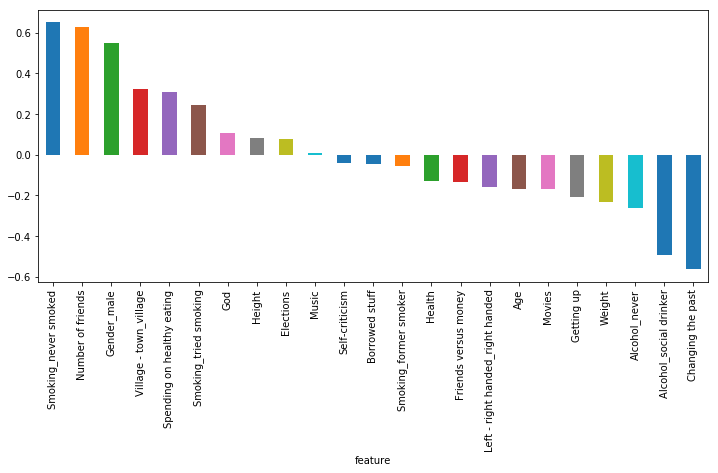

In [81]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": log_reg.coef_[4, : ]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))
featureImportance["importance"].tail(30).plot('bar', figsize=(12,5))